<a href="https://colab.research.google.com/github/SbgVit0r/Reposit-rio-IC/blob/main/Medicina_IA_Vitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inteligência Artifical no campo da Medicina
- Prof. Miguel Bozer
- Jacó Quaresma
- Vitor Sbeghi

In [ ]:
# Importando bibliotecas necessárias

import pandas as pd
import numpy as np
from google_drive_downloader import GoogleDriveDownloader as gdd

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler;
from sklearn.model_selection import GridSearchCV

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [ ]:
data_google_id = '1zHxIns0Vfbp0MWmr5XotiFhJ4FYgSq0C'
gdd.download_file_from_google_drive(file_id=data_google_id, dest_path = './dados.csv', showsize = True)

dados = pd.read_csv("dados.csv", sep = ',')

65.1 MiB Done.


In [ ]:
# Checando quantidade de dados e colunas
dados.shape

(445132, 41)

In [ ]:
dados.drop('Unnamed: 0', axis = 1, inplace=True)
dados.drop('_TOTINDA', axis = 1, inplace=True)

In [ ]:
# Plotando primeiras 5 linhas da tabela
dados.head()

,GENHLTH,SEXVAR,_HLTHPLN,_AIDTST4,_RFDRHV8,_RFSMOK3,_BMI5CAT,_ASTHMS1,CVDINFR4,_MICHD,...,EMPLOY1,INCOME3,WEIGHT2,HEIGHT3,SMOKE100,USENOW3,ECIGNOW2,AVEDRNK3,PREDIAB2,COPDCOGH
0,2.0,2.0,9.0,2.0,1.0,1.0,NaN,3.0,2.0,2.0,...,7.0,99.0,9999.0,9999.0,2.0,3.0,4.0,NaN,NaN,NaN
1,1.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,2.0,...,2.0,5.0,150.0,503.0,2.0,3.0,1.0,NaN,NaN,NaN
2,2.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,2.0,...,7.0,10.0,140.0,502.0,2.0,3.0,1.0,NaN,NaN,NaN
3,1.0,2.0,9.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,7.0,77.0,140.0,505.0,1.0,3.0,1.0,NaN,NaN,NaN
4,4.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,...,5.0,5.0,119.0,502.0,2.0,3.0,1.0,2.0,NaN,NaN


In [ ]:
# Checando por valores nulos
dados.isnull().sum()

,0
GENHLTH,3
SEXVAR,0
_HLTHPLN,0
_AIDTST4,46235
_RFDRHV8,0
_RFSMOK3,0
_BMI5CAT,48806
_ASTHMS1,0
CVDINFR4,4
_MICHD,5021


In [ ]:
# Checando informações das colunas (Índice, nome, qtd de valores não nulos e tipo de dado)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 39 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   445129 non-null  float64
 1   SEXVAR    445132 non-null  float64
 2   _HLTHPLN  445132 non-null  float64
 3   _AIDTST4  398897 non-null  float64
 4   _RFDRHV8  445132 non-null  float64
 5   _RFSMOK3  445132 non-null  float64
 6   _BMI5CAT  396326 non-null  float64
 7   _ASTHMS1  445132 non-null  float64
 8   CVDINFR4  445128 non-null  float64
 9   _MICHD    440111 non-null  float64
 10  SDHSTRE1  251211 non-null  float64
 11  CNCRTYP2  22544 non-null   float64
 12  CHCOCNC1  445129 non-null  float64
 13  COPDBRTH  7249 non-null    float64
 14  ADDEPEV3  445125 non-null  float64
 15  CVDSTRK3  445130 non-null  float64
 16  LSATISFY  254488 non-null  float64
 17  ACEDEPRS  48286 non-null   float64
 18  PHYSHLTH  445127 non-null  float64
 19  MENTHLTH  445129 non-null  float64
 20  POOR

# Próximas etapas:

# Análise Exploratória dos Dados

## 1.**(Opcional - Plano B)** Adicionar as colunas para checarmos se elas podem ser usadas no estudo:

EMTSUPRT -  How often do you get the social and emotional support you need?

SDHISOLT - How often do you feel socially isolated from others?  Is it…

SDHEMPLY - In the past 12 months have you lost employment or had hours reduced?

SDHFOOD1 - How often did the food that you bought not last, and you didn’t have money to get more?

SDHBILLS - During the last 12 months, was there a time when you were not able to pay your mortgage, rent or utility bills?

**Deixei como opcional porque essas colunas podem ser importantes, mas possuem muitos valores nulos. Vamos deixar isso para um segundo plano caso o modelo não funcione tão bem**

## 2. Muitas perguntas tem a resposta como "Dont Know/Refused/Missing" como uma possível resposta. Entretanto, pode ser que a pergunta não tenha a possibilidade desse tipo de resposta num caso prático. Para isso, analise os valores únicos de cada coluna e verifique quais casos vocês sugerem manter ou remover essa entrada.

Obs.: Evitem plotar gráficos, existem muitas linhas no conjunto de dados e isso poderá levar um tempo desnecessário para essa análise. Usem o método `unique()`

In [ ]:
# Um laço for in que percorre todas as colunas da tabela e usa a função "unique()" em cada uma
for column in dados.columns:
  print(f"Valores únicos em: '{column}':")
  print(dados[column].unique())
  print("\n")

Valores únicos em: 'GENHLTH':
[ 2.  1.  4.  5.  3.  9.  7. nan]


Valores únicos em: 'SEXVAR':
[2. 1.]


Valores únicos em: '_HLTHPLN':
[9. 1. 2.]


Valores únicos em: '_AIDTST4':
[ 2.  1.  9. nan]


Valores únicos em: '_RFDRHV8':
[1. 9. 2.]


Valores únicos em: '_RFSMOK3':
[1. 2. 9.]


Valores únicos em: '_BMI5CAT':
[nan  3.  2.  4.  1.]


Valores únicos em: '_ASTHMS1':
[3. 1. 2. 9.]


Valores únicos em: 'CVDINFR4':
[ 2.  1.  7.  9. nan]


Valores únicos em: '_MICHD':
[ 2.  1. nan]


Valores únicos em: 'SDHSTRE1':
[ 4.  5.  3.  7. nan  1.  2.  9.]


Valores únicos em: 'CNCRTYP2':
[nan  5.  7. 22. 16. 14. 13. 20. 99. 77. 19. 18.  1. 30. 15.  6.  8. 28.
 29. 23. 10.  9.  3. 12. 21. 26.  4.  2. 27. 25. 24. 17. 11.]


Valores únicos em: 'CHCOCNC1':
[ 2.  1.  7. nan  9.]


Valores únicos em: 'COPDBRTH':
[nan  2.  1.  7.  9.]


Valores únicos em: 'ADDEPEV3':
[ 2.  1.  9.  7. nan]


Valores únicos em: 'CVDSTRK3':
[ 2.  1.  7. nan  9.]


Valores únicos em: 'LSATISFY':
[ 1.  2.  3. nan  4.  7.

Caso houver colunas que devem ser removidas as respostas de "Dont Know/Refused/Missing", remover as respectivas linhas. Para isso:

- Crie uma mascara que seleciona as linhas com essas respostas;

- Descobrir o indice com dessas linhas: `dados[mask].index`

- Para remover essas linhas use: `dados.drop(index=dados[mask].index, inplace = True)`

In [ ]:
# Criando uma máscara que filtra as colunas e as linhas que tem apenas as respostas Dont Know/Refused/Missing
mask = (dados['_AIDTST4'] == 9) | (dados['_RFDRHV8'] == 9) | (dados['_RFSMOK3'] == 9) | (dados['EXERANY2'] == 9) | (dados['EXERANY2'] == 7) | (dados['CVDCRHD4'] == 9)| (dados['CVDCRHD4'] == 7) | (dados['DIABETE4'] == 9) | (dados['DIABETE4'] == 7) | (dados['CVDINFR4'] == 9) | (dados['CVDINFR4'] == 7)

# Teste para checar se o filtro foi realizado com sucesso
dados[mask].index

Index([     9,     15,     18,     19,     21,     22,     30,     38,     51,
           53,
       ...
       445102, 445103, 445109, 445118, 445122, 445125, 445126, 445127, 445129,
       445131],
      dtype='int64', length=76979)

In [ ]:
# Apagando as linhas filtradas
dados.drop(index=dados[mask].index, inplace=True)

## 3. As colunas HEIGHT3 e WEIGHT2 possuem uma resposta como 7777 para Dont Know e 9999 para Refused. Esse atributo está diretamente relacionado com uma característica importante. Creio que deveremos remover as linhas que tenham essas respostas. Para isso:

- Crie uma mascara que seleciona as linhas com essas respostas;

- Descobrir o indice com dessas linhas: `dados[mask].index`

- Para remover essas linhas use: `dados.drop(index=dados[mask].index, inplace = True)`

In [ ]:
# Criando uma máscara que filtra as colunas e as linhas que tem apenas as respostas Dont Know/Refused/Missing
mask2 = ((dados['HEIGHT3'] == 7777) | (dados['HEIGHT3'] == 9999)) | ((dados['WEIGHT2'] == 7777) | (dados['WEIGHT2'] == 9999))

# Teste para checar se o filtro foi realizado com sucesso
dados[mask2].index

Index([     0,      8,     63,     66,     67,     76,     79,     96,    124,
          145,
       ...
       444658, 444710, 444712, 444740, 444751, 444799, 444870, 444951, 445053,
       445061],
      dtype='int64', length=21416)

In [ ]:
# Apagando as linhas filtradas
dados.drop(index=dados[mask2].index, inplace=True)

In [ ]:
dados.shape

(346737, 39)

Outro problema dessa coluna que temos a resposta em inches e em metros para o HEIGHT3 (respostas com 9061 - 9998, onde o 9 inicial representa que o valor é em metros e 200-711 em inches). Corrigir isso deixando tudo em metros.

Algoritmo para conversão

Iniciar pelos valores 200-711 para não misturar os valores:
- Separar o primeiro algarismo do número que representa a altura em feet. Para isso, execute o módulo da divisão `//`. Exemplo a seguir:


In [ ]:
711//100

7

  - Obter o valor dos últimos dois digitos. Para isso, use o resto da divisão por 100. Exemplo a seguir:

In [ ]:
feet = 711//100
inches = 711%100
(feet, inches)

(7, 11)

In [ ]:
# Função que irá converter as medidas de polegadas para metros
def polegadas_para_metros(polegadas, pes):
  # 1 pé é igual a 12 polegadas.
  total_polegadas = pes * 12 + polegadas
  metros = total_polegadas * 2.54
  return metros

# Aplicando a função nos valores selecionados
dados.loc[(dados['HEIGHT3'] > 200) & (dados['HEIGHT3'] < 711), 'HEIGHT3'] = dados.loc[(dados['HEIGHT3'] > 200) & (dados['HEIGHT3'] < 711), 'HEIGHT3'].apply(lambda x: polegadas_para_metros(x // 100, x % 100))

# Filtrando as linhas com valores entre 9061 e 9998 e subtraindo 9000 com finalidade de tratar esses dados para o modelo
filtro_linhas2 = (dados['HEIGHT3'] >= 9061) & (dados['HEIGHT3'] <= 9999)
dados.loc[filtro_linhas2, 'HEIGHT3'] = dados.loc[filtro_linhas2, 'HEIGHT3'] - 9000


In [ ]:
# Checando os valores para ver se a subtração foi feita com sucesso
print(dados['HEIGHT3'].unique())
print(f"min = {dados['HEIGHT3'].min()}\nmax={dados['HEIGHT3'].max()}")

[104.14  73.66 165.1  347.98 134.62 256.54 195.58  43.18 137.16  76.2
 226.06 317.5   45.72 287.02  12.7  106.68 167.64  15.24 345.44 254.
  40.64 314.96  10.16 284.48 198.12 259.08 228.6  101.6  223.52 162.56
 165.   182.   167.   176.   350.52 175.   171.   170.18   7.62  48.26
 281.94 152.   170.   151.   153.   169.   156.   183.   184.   190.
 160.   154.   172.   187.   157.   174.   163.   161.   149.   178.
 140.   150.   155.   164.   158.   188.   162.   179.   168.   145.
 146.   189.   180.   193.04  17.78 289.56  99.06 132.08 173.    78.74
 177.   292.1  125.   166.   186.   195.   147.   159.   185.   342.9
 105.   320.04 148.   118.   138.   181.   144.    71.12 117.   193.
 190.5  160.02 198.   107.   120.    90.   505.   135.   110.   143.
 309.88 109.22 800.   192.   139.7  251.46 103.   261.62 801.    68.58
 130.   106.   142.   115.   200.66 116.   104.   109.    92.   196.
 711.   127.   207.   100.   312.42 108.   114.   752.   102.   129.54
 279.4  191.   202.   

### Tratando Outliers da coluna 'HEIGHT3'

<Axes: xlabel='HEIGHT3'>

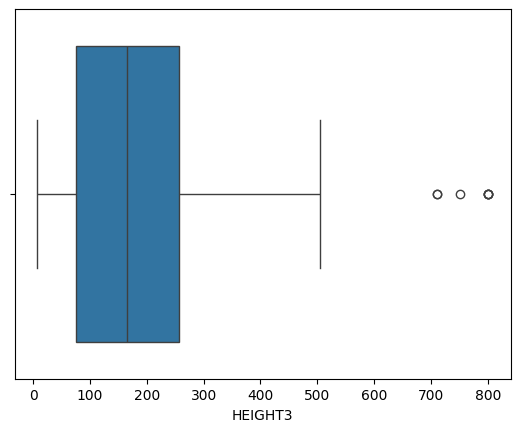

In [ ]:
sns.boxplot(data=dados, x = 'HEIGHT3')

In [ ]:
# Obtendo as informações númericas do boxplot
quartis = np.quantile(dados['HEIGHT3'], [0.25, 0.75])
quartis

array([ 76.2 , 256.54])

In [ ]:
# Calculando os limites superiores e inferiores:
lim_superior = quartis[0] + 1.5 * (quartis[1] - quartis[0])
lim_inferior = quartis[1] - 1.5 * (quartis[1] - quartis[0])

In [ ]:
mediana = dados['HEIGHT3'].median()
mediana

165.1

In [ ]:
mask = (dados['HEIGHT3'] < lim_inferior) | (dados['HEIGHT3'] > lim_superior)

In [ ]:
print(f"A coluna {'HEIGHT3'} possui {mask.sum()} outliers para serem tratados")

A coluna HEIGHT3 possui 21293 outliers para serem tratados


In [ ]:
dados.loc[mask,"HEIGHT3"] = mediana

A coluna WEIGHT2 tem um problema similar, o peso está em pounds e em kilogramas. Valores de 9023 até 9352 são os pesos em kilogramas com o 9 inicial indicando que o valor é em kilo e de 50 - 776 o peso está em pounds. Converter tudo para kilogramas

Tratando outliers:

In [ ]:
# Função que converte o valor de libras para quilos
def libras_para_quilos(libras):
  quilos = libras * 0.453592
  return quilos

# Filtrando colunas com valor entre 50 e 776
filtro_colunas = (dados['WEIGHT2'] >= 50) & (dados['WEIGHT2'] <= 776)
indices_filtrados = dados.index[filtro_colunas]

# Selecionando as linhas que iremos alterar seus valores.
mask = (dados['WEIGHT2'] > 9061) & (dados['WEIGHT2'] < 9998)
# Removendo 9000 dos valores em centimetros:
dados.loc[mask,'WEIGHT2'] = dados.loc[mask,'WEIGHT2'] - 9000

# Selecionando as colunas com base no índice e aplicando a conversão nos valores
dados.loc[indices_filtrados, 'WEIGHT2'] = dados.loc[indices_filtrados, 'WEIGHT2'].apply(libras_para_quilos)

In [ ]:
# Checando os valores para ver se a subtração foi feita com sucesso
print(dados['WEIGHT2'].unique())
print(f"min = {dados['WEIGHT2'].min()}\nmax={dados['WEIGHT2'].max()}")

[  68.0388     63.50288    53.977448   84.821704   62.595696   73.481904
   74.84268    59.420552   85.275296  106.59412    71.213944   61.23492
   90.7184     80.285784  107.047712   57.152592  105.233344   77.11064
   56.699      79.3786     86.18248   113.398     102.0582     59.874144
   65.77084   104.32616    81.64656    53.523856   61.688512  136.0776
   34.472992  127.00576    78.925008   58.96696    92.079176   49.89512
   83.91452   117.93392    71.667536  102.965384   62.142104   83.460928
   72.57472    54.43104    60.781328  117.026736   65.317248   88.45044
   89.811216   74.389088   68.945984   79.832192  108.408488   90.264808
   55.791816   91.625584   47.173568   78.017824   50.802304   91.171992
   47.62716    84.368112  145.14944    93.893544  122.46984    95.25432
   48.987936   73.935496   88.904032   80.739376   81.192968  158.7572
   97.52228    51.709488   82.553744   76.203456   75.296272   70.30676
   63.049288  115.66596    66.224432   86.636072  108.86208  

### Tratando Outliers da coluna 'WEIGHT2'

<Axes: xlabel='WEIGHT2'>

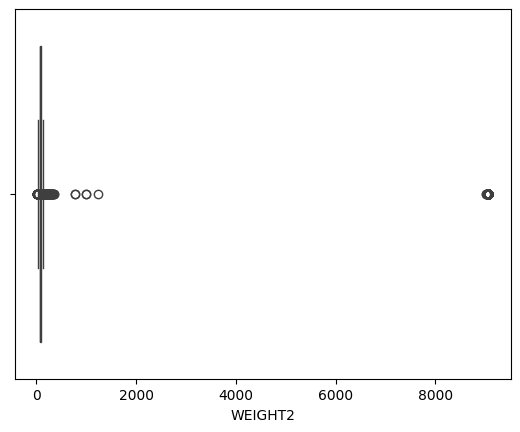

In [ ]:
sns.boxplot(data=dados, x = 'WEIGHT2')

In [ ]:
# Obtendo as informações númericas do boxplot
quartis = np.quantile(dados['WEIGHT2'], [0.25, 0.75])
quartis

array([68.0388 , 95.25432])

In [ ]:
# Calculando os limites superiores e inferiores:
lim_superior = quartis[0] + 1.5 * (quartis[1] - quartis[0])
lim_inferior = quartis[1] - 1.5 * (quartis[1] - quartis[0])

In [ ]:
mediana = dados['WEIGHT2'].median()
mediana

81.64656

In [ ]:
mask = (dados['WEIGHT2'] < lim_inferior) | (dados['WEIGHT2'] > lim_superior)

In [ ]:
print(f"A coluna {'WEIGHT2'} possui {mask.sum()} outliers para serem tratados")

A coluna WEIGHT2 possui 52090 outliers para serem tratados


In [ ]:
dados.loc[mask,"WEIGHT2"] = mediana

## 4. Remover as colunas com muitos valores nulos:

Remover as colunas 'COPDCOGH', 'PREDIAB2', 'AVEDRNK3', 'ACEDEPRS', 'COPDBRTH','CNCRTYP2','SDHSTRE1', 'POORHLTH'
A coluna LSATISFY é muito interessante, mas tem muitos valores nulos. Logo crie um segundo DataFrame que inclui ela para podermos fazer um estudo que inclui ela.

Obs.: Crie um novo dataframe a partir de dados com: `dados_sats = dados.copy()`

In [ ]:
dados_sats = dados.copy()

dados_sats.drop(['COPDCOGH', 'PREDIAB2','AVEDRNK3','ACEDEPRS', 'COPDBRTH','CNCRTYP2','SDHSTRE1','POORHLTH'],axis = 1, inplace=True)

dados_sats

,GENHLTH,SEXVAR,_HLTHPLN,_AIDTST4,_RFDRHV8,_RFSMOK3,_BMI5CAT,_ASTHMS1,CVDINFR4,_MICHD,...,DIABETE4,EDUCA,MARITAL,EMPLOY1,INCOME3,WEIGHT2,HEIGHT3,SMOKE100,USENOW3,ECIGNOW2
1,1.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,2.0,...,3.0,4.0,3.0,2.0,5.0,68.038800,104.14,2.0,3.0,1.0
2,2.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,2.0,...,3.0,6.0,1.0,7.0,10.0,63.502880,73.66,2.0,3.0,1.0
3,1.0,2.0,9.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,3.0,4.0,1.0,7.0,77.0,63.502880,165.10,1.0,3.0,1.0
4,4.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,...,3.0,5.0,1.0,5.0,5.0,81.646560,73.66,2.0,3.0,1.0
5,5.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,...,1.0,4.0,1.0,7.0,99.0,84.821704,165.10,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445121,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,...,3.0,3.0,6.0,4.0,99.0,95.254320,15.24,1.0,3.0,1.0
445123,4.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,...,3.0,6.0,5.0,1.0,4.0,90.718400,137.16,2.0,3.0,1.0
445124,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,...,1.0,6.0,1.0,1.0,9.0,83.914520,195.58,2.0,3.0,1.0
445128,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,...,3.0,6.0,1.0,1.0,7.0,83.007336,226.06,2.0,3.0,1.0


Agora em um outro DataFrame Remover as colunas 'COPDCOGH', 'PREDIAB2', 'AVEDRNK3', 'ACEDEPRS', 'COPDBRTH','CNCRTYP2','SDHSTRE1', 'POORHLTH', 'LSATISFY'

O objetivo aqui é tentar manter o máximo de linhas do conjunto de dados original para termos algo rico para trabalharmos.

Obs.: Crie um dataframe com `dados_brutos = dados.copy()`

In [ ]:
dados_brutos = dados.copy()

dados_brutos.drop(['COPDCOGH', 'PREDIAB2', 'AVEDRNK3', 'ACEDEPRS', 'COPDBRTH','CNCRTYP2','SDHSTRE1', 'POORHLTH', 'LSATISFY'], axis=1, inplace=True)

dados_brutos

,GENHLTH,SEXVAR,_HLTHPLN,_AIDTST4,_RFDRHV8,_RFSMOK3,_BMI5CAT,_ASTHMS1,CVDINFR4,_MICHD,...,DIABETE4,EDUCA,MARITAL,EMPLOY1,INCOME3,WEIGHT2,HEIGHT3,SMOKE100,USENOW3,ECIGNOW2
1,1.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,2.0,...,3.0,4.0,3.0,2.0,5.0,68.038800,104.14,2.0,3.0,1.0
2,2.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,2.0,...,3.0,6.0,1.0,7.0,10.0,63.502880,73.66,2.0,3.0,1.0
3,1.0,2.0,9.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,3.0,4.0,1.0,7.0,77.0,63.502880,165.10,1.0,3.0,1.0
4,4.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,...,3.0,5.0,1.0,5.0,5.0,81.646560,73.66,2.0,3.0,1.0
5,5.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,...,1.0,4.0,1.0,7.0,99.0,84.821704,165.10,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445121,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,...,3.0,3.0,6.0,4.0,99.0,95.254320,15.24,1.0,3.0,1.0
445123,4.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,...,3.0,6.0,5.0,1.0,4.0,90.718400,137.16,2.0,3.0,1.0
445124,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,...,1.0,6.0,1.0,1.0,9.0,83.914520,195.58,2.0,3.0,1.0
445128,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,...,3.0,6.0,1.0,1.0,7.0,83.007336,226.06,2.0,3.0,1.0


REMOVER OS VALORES NULOS APÓS TRANSFORMAÇÕES:

In [ ]:
dados_sats.dropna(inplace = True)
dados_sats.isnull().sum()

,0
GENHLTH,0
SEXVAR,0
_HLTHPLN,0
_AIDTST4,0
_RFDRHV8,0
_RFSMOK3,0
_BMI5CAT,0
_ASTHMS1,0
CVDINFR4,0
_MICHD,0


In [ ]:
dados_brutos.dropna(inplace = True)
dados_brutos.isnull().sum()

,0
GENHLTH,0
SEXVAR,0
_HLTHPLN,0
_AIDTST4,0
_RFDRHV8,0
_RFSMOK3,0
_BMI5CAT,0
_ASTHMS1,0
CVDINFR4,0
_MICHD,0


# Aplicando Modelos de IA:



## Projeto para estimativa de problemas depressivos

Aqui podemos analisar o cenário da depressão ou doenças relacionadas com a coluna ADDEPEV3

Essa coluna tem respostas como 7	Don’t know/Not sure e 9	Refused. O modelo não poderá ter essas saídas. Nesse cenário, temos que remover as linhas que tem esses valores como resposta.

Para isso:

- Crie uma mascara que seleciona as linhas com essas respostas;

- Descobrir o indice com dessas linhas: `dados[mask].index`

- Para remover essas linhas use: `dados.drop(index=dados[mask].index, inplace = True)`

In [ ]:
mask3 = ((dados['ADDEPEV3'] == 7) | (dados['ADDEPEV3'] == 9))

dados[mask3].index

Index([   661,    772,    997,   1083,   2653,   2798,   3307,   3523,   4549,
         4596,
       ...
       441729, 442880, 443511, 443757, 443899, 444142, 444196, 444363, 444945,
       445033],
      dtype='int64', length=1486)

In [ ]:
dados.drop(index=dados[mask3].index, inplace = True)

In [ ]:
dados['ADDEPEV3'].unique()

array([ 2.,  1., nan])

### Separando em conjuntos de treino e teste e treinando modelos de IA

In [ ]:
# Dividindo em X e y
X = dados.drop(columns=['ADDEPEV3'])
y = dados['ADDEPEV3']

In [ ]:
dados.describe()

,GENHLTH,SEXVAR,_HLTHPLN,_AIDTST4,_RFDRHV8,_RFSMOK3,_BMI5CAT,_ASTHMS1,CVDINFR4,_MICHD,...,EMPLOY1,INCOME3,WEIGHT2,HEIGHT3,SMOKE100,USENOW3,ECIGNOW2,AVEDRNK3,PREDIAB2,COPDCOGH
count,345250.000000,345251.000000,345251.000000,341139.000000,345251.000000,345251.000000,343280.000000,345251.000000,345249.000000,345250.000000,...,345250.000000,345248.000000,345251.000000,345251.000000,345251.000000,345250.000000,345248.000000,185490.000000,111805.000000,6162.000000
mean,2.551348,1.515289,1.292208,1.656284,1.068747,1.120767,3.010222,2.793434,1.945228,1.912052,...,3.802332,19.523800,79.992715,163.325906,1.602790,2.956269,1.644838,2.724492,2.726819,1.892567
std,1.065291,0.499767,1.383998,0.474948,0.253024,0.325857,0.834425,0.813060,0.227535,0.283219,...,2.876079,29.906879,13.018308,93.484617,0.489321,0.334300,1.214665,6.650605,0.738738,0.448424
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,54.431040,7.620000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,...,1.000000,6.000000,70.306760,76.200000,1.000000,3.000000,1.000000,1.000000,3.000000,2.000000
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,...,2.000000,8.000000,81.646560,165.100000,2.000000,3.000000,1.000000,2.000000,3.000000,2.000000
75%,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,7.000000,10.000000,88.450440,226.060000,2.000000,3.000000,1.000000,3.000000,3.000000,2.000000
max,9.000000,2.000000,9.000000,2.000000,2.000000,2.000000,4.000000,9.000000,2.000000,2.000000,...,9.000000,99.000000,108.862080,345.440000,2.000000,9.000000,9.000000,88.000000,9.000000,9.000000


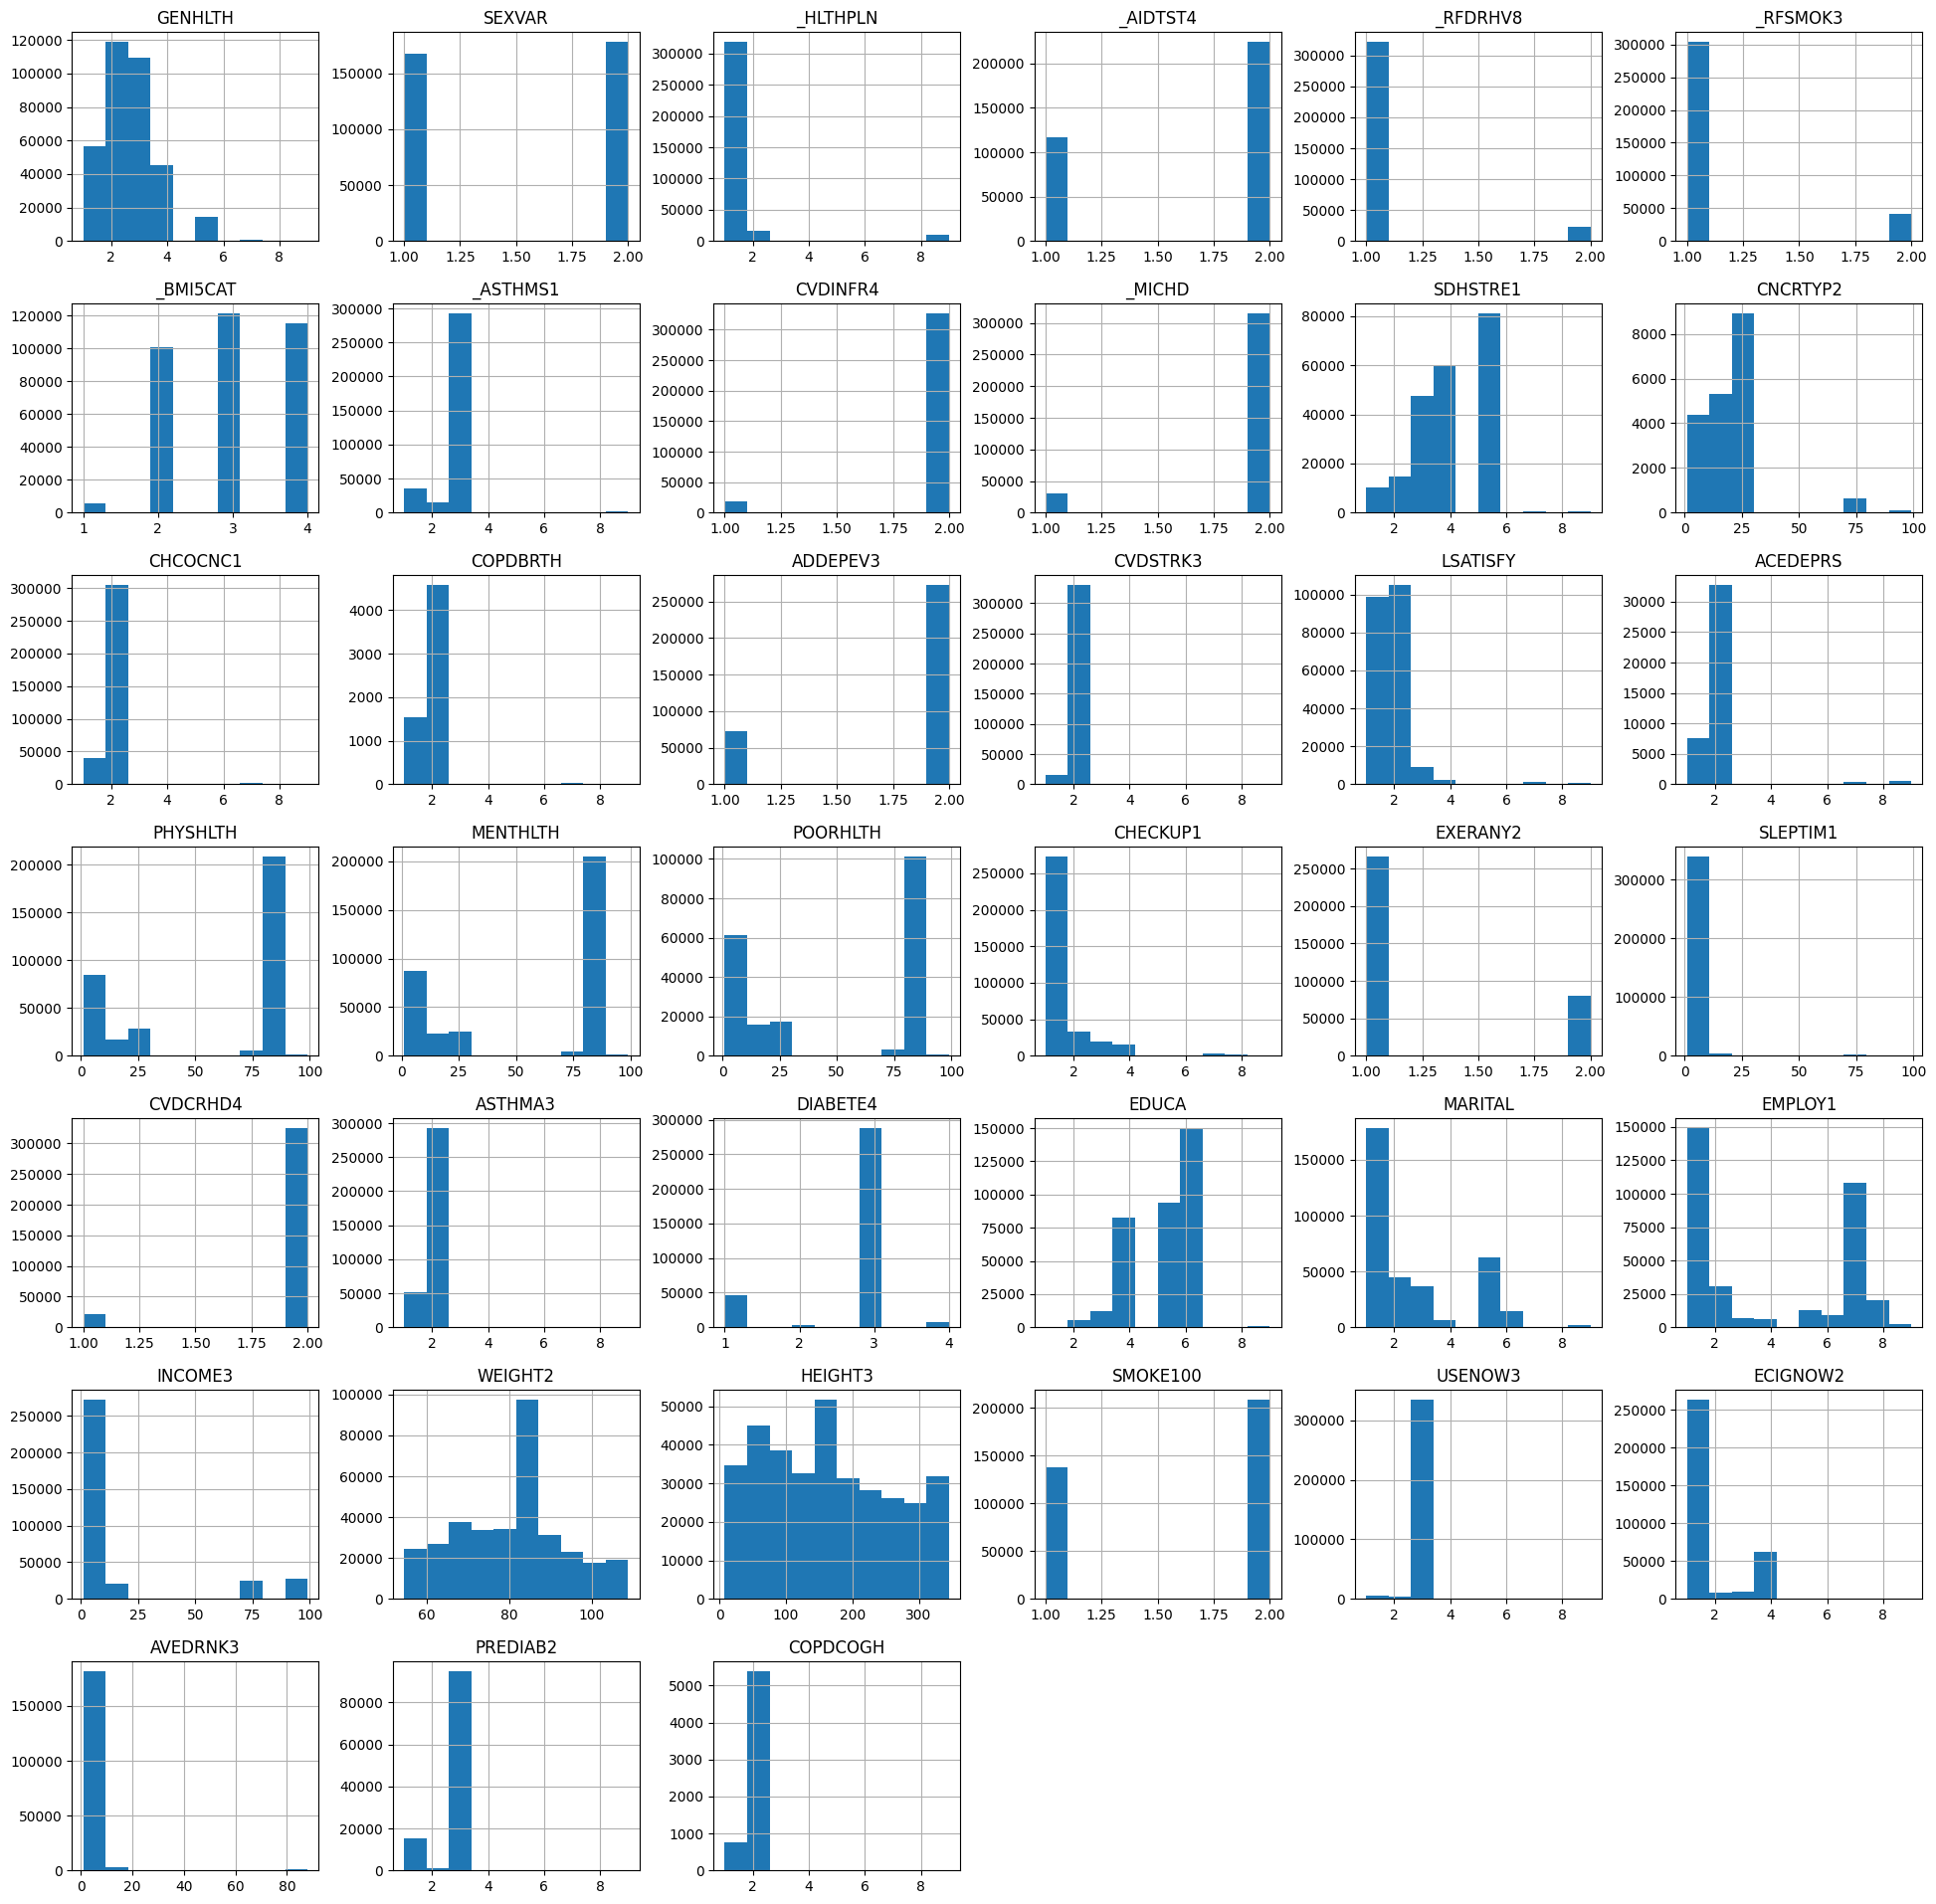

In [ ]:
dados.hist(figsize=(24, 24))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=25)

In [ ]:
# Como podemos ver nos gráficos plotados acima, as colunas não estão com uma distribuição normal por isso é necessário aplicar a normalização

# Aplicando normalização
scaler = MinMaxScaler().fit(X_train)

# Mudando escala dos dados
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

#### Tratando valores nulos

In [ ]:
X_train.isnull().sum()

GENHLTH          1
SEXVAR           0
_HLTHPLN         0
_AIDTST4      2887
_RFDRHV8         0
_RFSMOK3         0
_BMI5CAT      1414
_ASTHMS1         0
CVDINFR4         2
_MICHD           1
SDHSTRE1     91391
CNCRTYP2    228225
CHCOCNC1         1
COPDBRTH    237385
CVDSTRK3         0
LSATISFY     89550
ACEDEPRS    212985
PHYSHLTH         2
MENTHLTH         1
POORHLTH    101845
CHECKUP1         1
EXERANY2         0
SLEPTIM1         0
CVDCRHD4         0
ASTHMA3          0
DIABETE4         0
EDUCA            0
MARITAL          2
EMPLOY1          1
INCOME3          2
WEIGHT2          0
HEIGHT3          0
SMOKE100         0
USENOW3          1
ECIGNOW2         3
AVEDRNK3    111935
PREDIAB2    163484
COPDCOGH    237370
dtype: int64

In [ ]:
y_train.isnull().sum()

2

In [ ]:
# Calcula a moda de y_train
mode_value = y_train.mode().iloc[0]

# Preenche valores nulos com a moda
y_train = y_train.fillna(mode_value)

In [ ]:
# Calcula a moda de X_train
mode_value = X_train.mode().iloc[0]

# Preenche valores nulos com a moda
X_train = X_train.fillna(mode_value)

#### Estudo de Hiperparâmetros

In [ ]:
modelo = GradientBoostingClassifier(verbose=2)

# Criando o GridSearchCV
parametros = {'max_depth' : range(2,20),
              'min_samples_split': range(2,10)}

modelo_GS = GridSearchCV(modelo, parametros, verbose=10)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

A saída de streaming foi truncada nas últimas 5000 linhas.
        43           0.7219            1.12m
        44           0.7208            1.09m
        45           0.7197            1.07m
        46           0.7185            1.05m
        47           0.7175            1.03m
        48           0.7164            1.01m
        49           0.7154           59.88s
        50           0.7145           59.17s
        51           0.7137           57.84s
        52           0.7127           56.55s
        53           0.7117           55.24s
        54           0.7110           53.93s
        55           0.7102           52.66s
        56           0.7094           51.37s
        57           0.7086           50.09s
        58           0.7075           48.84s
        59           0.7067           47.58s
        60           0.7059           46.48s
        61           0.7052           45.58s
        62           0.7044           44.61s
        63           0.7037           43.